In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
df = pd.read_csv('datasett.csv')
# Test :))

In [ ]:
#Printer litt info om datasettet
print(len(df))
print(len(df.columns))
print(df.columns)

181250
57
Index(['documentDate', 'picturedate', 'lastchanged', 'adcreated', 'price',
       'listprice', 'lat', 'lng', 'address', 'apartmentnumber',
       'apartmenttype', 'conveyancetype', 'finncode', 'BRA', 'PROM',
       'buildyear', 'matrikkel', 'bedrooms', 'rooms', 'bathrooms', 'WC',
       'elevator', 'floor', 'housingtype', 'commondebt', 'commoncosts',
       'F_Aircondition', 'F_Alarm', 'F_BalkongTerrasse', 'F_Barnevennlig',
       'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass',
       'F_Heis', 'F_Ingen gjenboere', 'F_Lademulighet', 'F_Livsløpsstandard',
       'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted',
       'F_Rolig', 'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste',
       'F_Bademulighet', 'F_Fiskemulighet', 'F_Turterreng', 'adtitle',
       'N_modernisering', 'N_oppussing', 'N_regulert', 'N_garasjemulighet',
       'postcode', 'Parking', 'price_inc_debt', 'area_id'],
      dtype='object')


In [ ]:
#Sjekker null-verdier
df.isnull().sum()

documentDate                        0
picturedate                       257
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                              1568
lng                              1568
address                             0
apartmentnumber                   822
apartmenttype                     792
conveyancetype                      0
finncode                            0
BRA                              3273
PROM                                0
buildyear                         925
matrikkel                           0
bedrooms                         9385
rooms                           51910
bathrooms                           0
WC                                  0
elevator                          792
floor                           37977
housingtype                         0
commondebt                      58689
commoncosts                     15759
F_Airconditi

In [ ]:
df["lng"].describe()

count    179682.000000
mean         10.777217
std           0.132330
min           5.372300
25%          10.740151
50%          10.773260
75%          10.814118
max          59.947437
Name: lng, dtype: float64

In [ ]:
df_latlng = df.copy()

In [ ]:
df_latlng.drop(df[df["lat"] < 59.8].index, inplace=True)
df_latlng.drop(df[df["lat"] > 60].index, inplace=True)

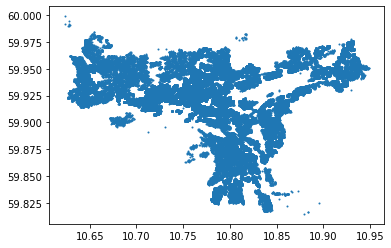

In [ ]:
plt.scatter(df_latlng["lng"],df_latlng["lat"], s=1)
plt.show()

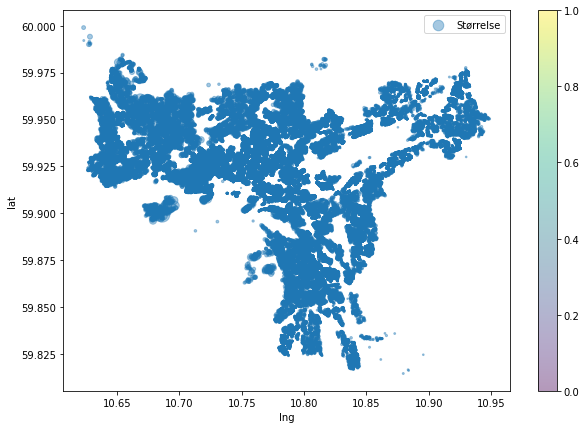

In [ ]:
df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)                     #  each subplot x- or y-axis will be independent  

plt.legend()
plt.show()


# Try to put an error into cmap then you get a suggestion of all the possibilities


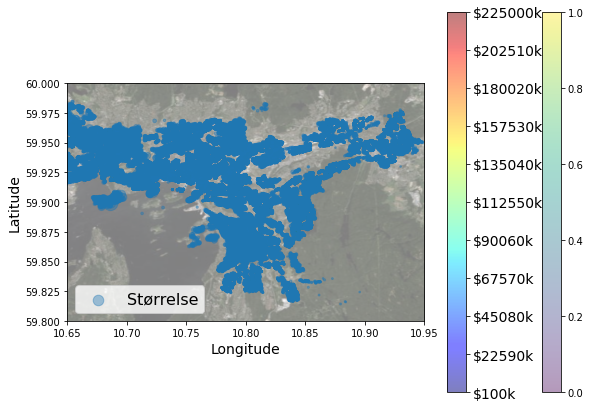

In [ ]:
oslo_img=mpimg.imread('oslo.png')

ax = df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)  

plt.imshow(oslo_img,
           extent=[10.65, 10.95, 59.8, 60],
           alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_latlng["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [ ]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,F_Turterreng,adtitle,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,NaN,VISNING AVLYST! Direkte bud til selger. Topple...,False,False,False,False,653,1,5150000.0,1
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,1.0,Innbydende og lys 2-roms hjørneleilighet - Ves...,False,False,False,False,283,1,3944838.0,6
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,1.0,Oppussingsobjekt - Enebolig i kjede med skjerm...,False,True,False,False,1176,1,9900000.0,14
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,NaN,BRATTLIKOLLEN - Lys og gjennomgående 3-roms se...,False,False,False,False,1184,0,1678207.0,14
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,NaN,GAMLE FURUSET - Velholdt og romslig enebolig m...,False,False,False,False,1053,0,5760000.0,12


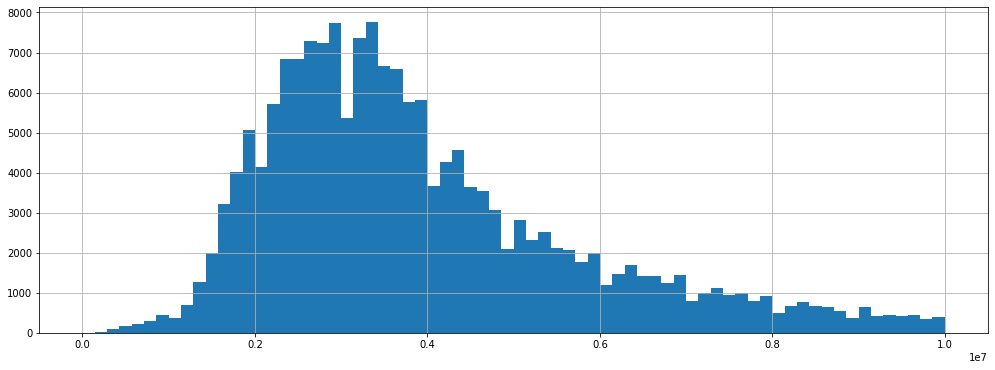

In [ ]:
df['price'].hist(bins=70, range=[0,10000000], figsize=(17,6))
plt.show()

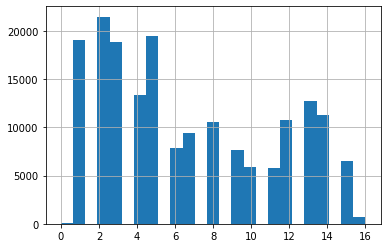

In [ ]:
df["area_id"].hist(bins=25)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a076037-bdbc-4d12-92b5-75ebface7fab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>